# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, plot_roc_curve 
from sklearn.metrics import roc_curve, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score, KFold
from sklearn.decomposition import PCA

# Libraries Versions 

In [ ]:
# show the __version__ of all libraries

# Importing and Analysis Of Datasets

In [ ]:
def basic_info(data):
    
    '''
    
    This funtions show some basics informations about datasets for a more efficient analysis
    and return all the columns categorized by "categorical" and "numerical" variables.
    
    '''
    
    print("Dataset shape is: ", data.shape)
    print("Dataset size is: ", data.size)
    print("Dataset columns are: ", data.columns)
    print("Dataset info is: ", data.info())
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical variables are:\n ", categorical)
    print("Numerical variables are:\n ", numerical)
    return categorical, numerical

### 1 - RAIN

In [ ]:
rain = pd.read_csv('rain_data_aus.csv')
categorical, numerical = basic_info(rain)

Dataset shape is:  (142193, 23)
Dataset size is:  3270439
Dataset columns are:  Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humi

In [ ]:
rain.describe(include=['object'])

,date,location,raintoday,raintomorrow
count,142193,142193,140787,142193
unique,3436,49,2,2
top,2016-07-07,Canberra,No,No
freq,49,3418,109332,110316


In [ ]:
# transforming some categorical columns in numerical ones

rain['raintoday'].replace({'No': 0, 'Yes': 1},inplace = True)
rain['raintomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [ ]:
rain.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,...,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,...,141289.000000,139467.000000,140787.000000,142193.000000,142193.000000,141871.000000,138583.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,68.843810,51.482606,1017.653758,1015.258204,4.437189,...,16.987509,21.687235,0.223423,2.360682,0.224181,28.505419,61.991179,10.014164,10.000748,0.227804
std,6.403283,7.117618,8.465173,4.188537,3.781525,19.051293,20.797772,7.105476,7.036677,2.887016,...,6.492838,6.937594,0.416541,8.477969,0.417043,10.237506,26.649111,3.169832,4.997908,0.272764
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,...,-7.200000,-5.400000,0.000000,0.000000,0.000000,-3.760000,2.000000,0.000000,-17.739346,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,57.000000,37.000000,1012.900000,1010.400000,1.000000,...,12.300000,16.600000,0.000000,0.000000,0.000000,22.520000,44.000000,8.000000,6.650238,0.030055
50%,12.000000,22.600000,0.000000,4.800000,8.500000,70.000000,52.000000,1017.600000,1015.200000,5.000000,...,16.700000,21.100000,0.000000,0.000000,0.000000,28.520000,63.200000,10.000000,10.000009,0.100853
75%,16.800000,28.200000,0.800000,7.400000,10.600000,83.000000,66.000000,1022.400000,1020.000000,7.000000,...,21.600000,26.400000,0.000000,0.800000,0.000000,35.480000,80.000000,12.000000,13.389306,0.329507
max,33.900000,48.100000,371.000000,145.000000,14.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,...,40.200000,46.700000,1.000000,371.000000,1.000000,59.720000,122.000000,26.000000,32.478590,0.999400


### 2 - WIND

In [ ]:
wind = pd.read_csv('wind.csv')
categorical, numerical = basic_info(rain)

Dataset shape is:  (142193, 23)
Dataset size is:  3270439
Dataset columns are:  Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humi

In [ ]:
wind.describe(include=['object'])

,date,location,wind_gustdir,wind_dir9am,wind_dir3pm
count,164386,164386,153808,152958,159551
unique,3436,49,16,16,16
top,2016-10-24,Canberra,W,N,SE
freq,98,3877,11451,13294,12019


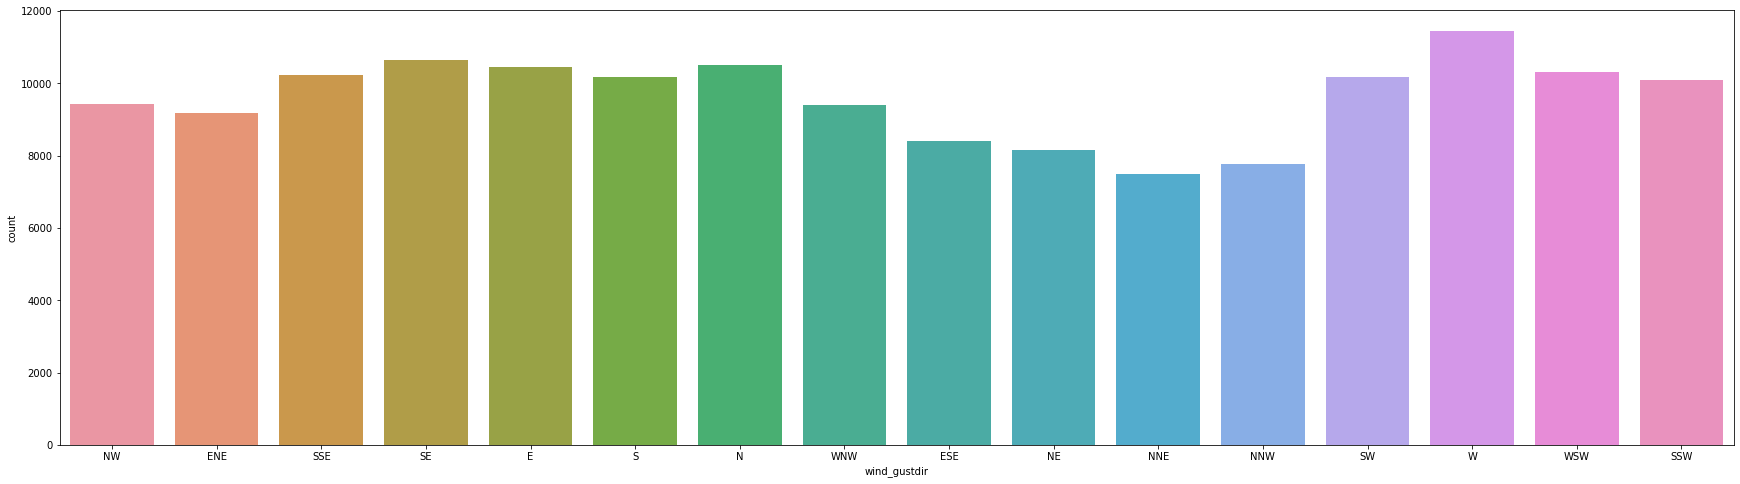

W      11451
SE     10654
N      10513
E      10446
WSW    10320
SSE    10239
S      10169
SW     10158
SSW    10078
NW      9436
WNW     9398
ENE     9167
ESE     8389
NE      8140
NNW     7753
NNE     7497
Name: wind_gustdir, dtype: int64

In [ ]:
#analysing categorical variables

plt.figure(figsize=(30, 8))
sns.countplot(wind['wind_gustdir'])
plt.show()
wind['wind_gustdir'].value_counts()

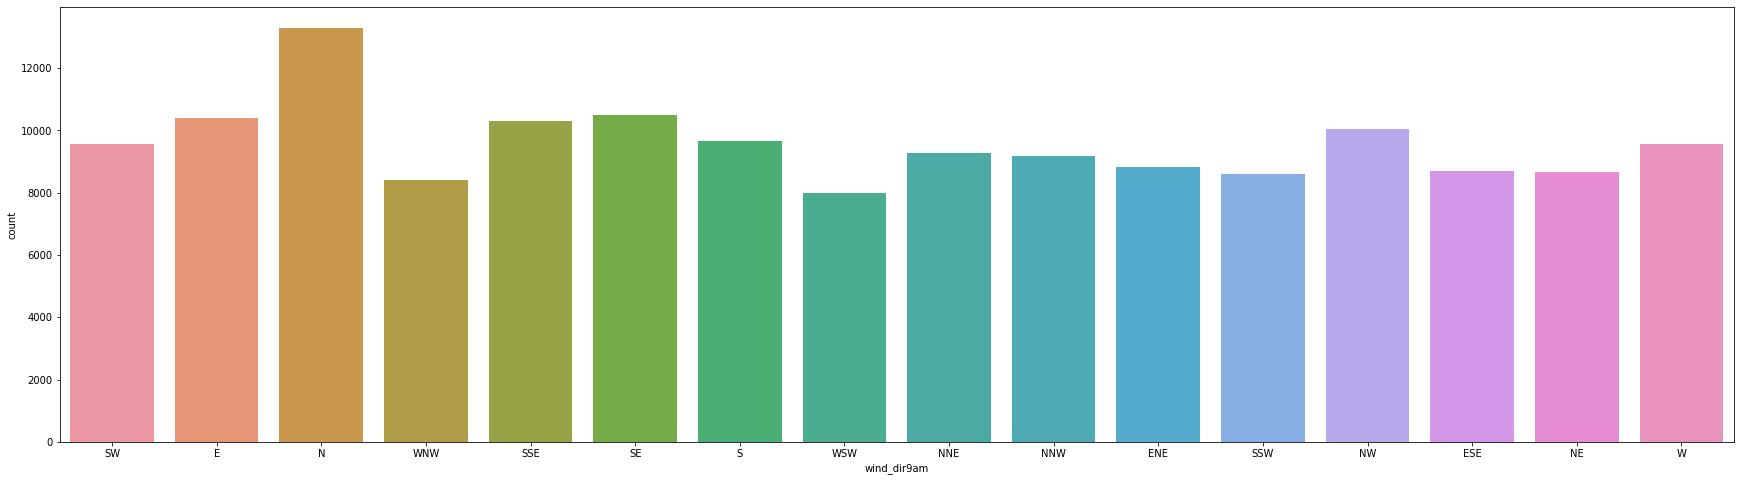

N      13294
SE     10503
E      10397
SSE    10289
NW     10039
S       9663
W       9573
SW      9562
NNE     9278
NNW     9175
ENE     8831
ESE     8711
NE      8650
SSW     8595
WNW     8414
WSW     7984
Name: wind_dir9am, dtype: int64

In [ ]:
plt.figure(figsize=(30, 8))
sns.countplot(wind['wind_dir9am'])
plt.show()
wind['wind_dir9am'].value_counts()

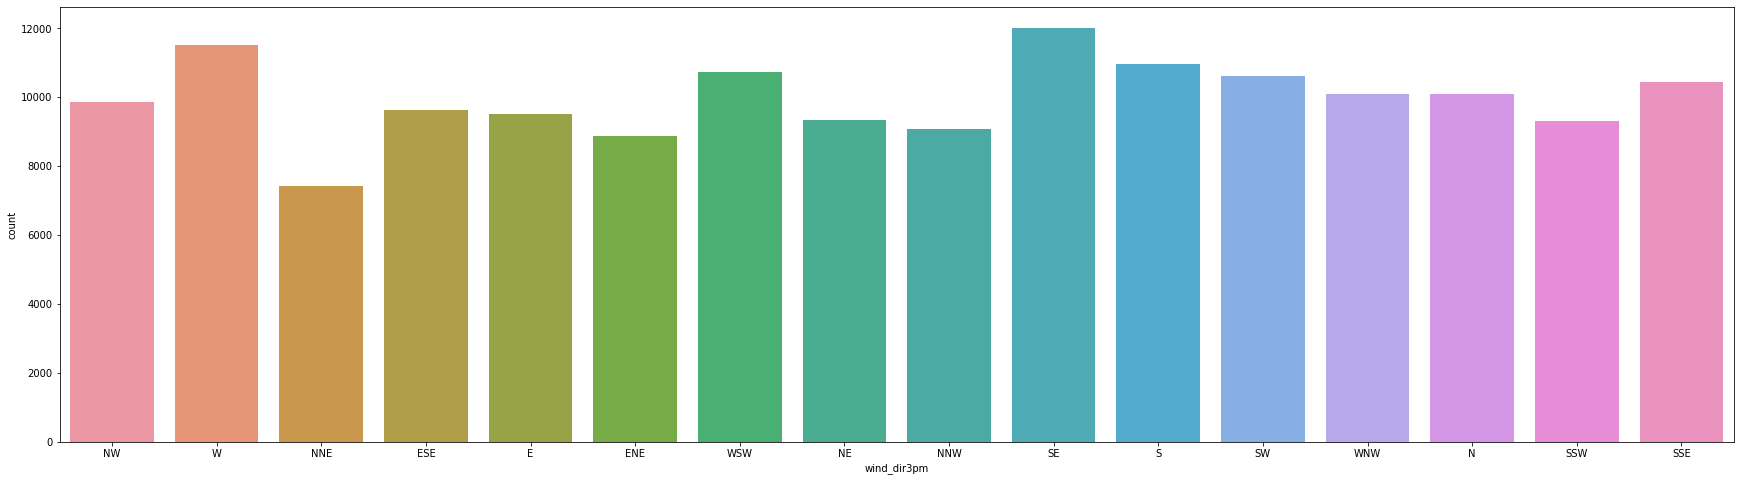

SE     12019
W      11523
S      10971
WSW    10729
SW     10630
SSE    10439
N      10104
WNW    10090
NW      9860
ESE     9623
E       9517
NE      9341
SSW     9301
NNW     9089
ENE     8881
NNE     7434
Name: wind_dir3pm, dtype: int64

In [ ]:
plt.figure(figsize=(30, 8))
sns.countplot(wind['wind_dir3pm'])
plt.show()
wind['wind_dir3pm'].value_counts()

In [ ]:
dummie_wind = pd.get_dummies(wind[['wind_gustdir', 'wind_dir3pm', 'wind_dir9am']], drop_first=True)
dummie_wind.shape

# decied not inclued "dumie_wind" because it only seems to bring unnecessary complexty 

(164386, 45)

## Merge Datasets

In [ ]:
rain_w = pd.merge(rain, wind, on=['date','location'])
rain_w = rain_w.drop_duplicates()

In [ ]:
# date string to date datetime type (datatime library):
rain_w.loc[:,'date'] = pd.to_datetime(rain_w.loc[:,'date'])

In [ ]:
basic_info(rain_w)

Dataset shape is:  (142193, 30)
Dataset size is:  4265790
Dataset columns are:  Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'wind_gustdir', 'wind_gustspeed',
       'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm',
       'labels'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 164384
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              142193 non-null  datetime64[ns]
 1   location          142193 non-null  object        
 2   mintemp           141556 non-null  float64       
 3   maxtemp           141871 non-null  floa

(['location', 'wind_gustdir', 'wind_dir9am', 'wind_dir3pm'],
 ['date',
  'mintemp',
  'maxtemp',
  'rainfall',
  'evaporation',
  'sunshine',
  'humidity9am',
  'humidity3pm',
  'pressure9am',
  'pressure3pm',
  'cloud9am',
  'cloud3pm',
  'temp9am',
  'temp3pm',
  'raintoday',
  'amountOfRain',
  'raintomorrow',
  'temp',
  'humidity',
  'precipitation3pm',
  'precipitation9am',
  'modelo_vigente',
  'wind_gustspeed',
  'wind_speed9am',
  'wind_speed3pm',
  'labels'])

In [ ]:
print('porcentagem de dados nulos:\n')
print(round(rain_w.isna().sum()/rain_w.shape[0]*100))

porcentagem de dados nulos:

date                 0.0
location             0.0
mintemp              0.0
maxtemp              0.0
rainfall             1.0
evaporation         43.0
sunshine            48.0
humidity9am          1.0
humidity3pm          3.0
pressure9am         10.0
pressure3pm         10.0
cloud9am            38.0
cloud3pm            40.0
temp9am              1.0
temp3pm              2.0
raintoday            1.0
amountOfRain         0.0
raintomorrow         0.0
temp                 0.0
humidity             3.0
precipitation3pm     0.0
precipitation9am     0.0
modelo_vigente       0.0
wind_gustdir         7.0
wind_gustspeed       7.0
wind_dir9am          7.0
wind_dir3pm          3.0
wind_speed9am        1.0
wind_speed3pm        2.0
labels               0.0
dtype: float64


**Columns with more than 30% NaN are:**

evaporation,
sunshine, 
cloud9am,
cloud3pm,


In [ ]:
rainw = rain_w.copy().drop(columns=['evaporation', 'sunshine', 'cloud9am', 'cloud3pm'])

In [ ]:
rainw.dropna(inplace=True)

## Check for Correlations for Insights

In [ ]:
correlation = rain_w.corr()

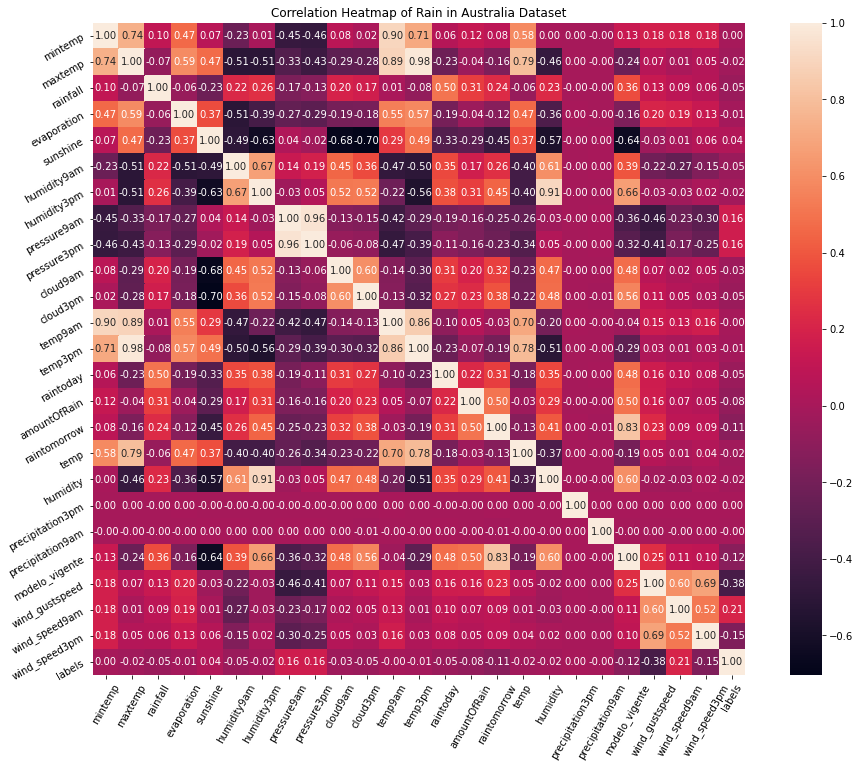

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

This was a gigante waste of time!

# Machine Learning Models

## First Baseline

### Split Model Into Train and Test

In [ ]:
# target variables 
y = rainw.copy()['raintomorrow']

# have to leave 'date' column out because datetime type still categorical

X = rainw.copy().drop(columns=['date','location', 'wind_gustdir', 'wind_dir9am', 'wind_dir3pm', 'raintomorrow'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Standardize

In [ ]:
scalar = StandardScaler()

scalar = scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## Model 1 - Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
model.score(X_train, y_train)

0.9959929156519814

In [ ]:
model.score(X_test, y_test)

0.9958379455390746

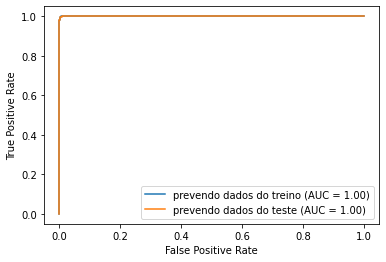

In [ ]:
fig, ax = plt.subplots()

plot_roc_curve(model, X_train, y_train, ax=ax, name = 'prevendo dados do treino')
plot_roc_curve(model, X_test, y_test, ax=ax, name = 'prevendo dados do teste')
plt.show();

### The model fitted with almost 100% precision and we find that very is strange! So we will take a closer look at the variables

In [ ]:
coef = pd.DataFrame(zip(model.coef_[0], X.columns))
coef

,0,1
0,-0.183578,mintemp
1,-0.456941,maxtemp
2,-0.141900,rainfall
3,0.164076,humidity9am
4,-1.143744,humidity3pm
5,0.130636,pressure9am
6,0.346539,pressure3pm
7,0.515759,temp9am
8,0.193467,temp3pm
9,-0.245227,raintoday


#### Find the variable that influenced the most on the model by finding the highier coefficient: amountOfRain


In [ ]:
coef.iloc[coef[0].idxmax()]

0         39.3736
1    amountOfRain
Name: 10, dtype: object

#### Observe all variables "rain" related and find any correlation

In [ ]:
rainw[['raintomorrow', 'raintoday', 'rainfall', 'amountOfRain']].head(30)

,raintomorrow,raintoday,rainfall,amountOfRain
0,0,0.0,0.6,0.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,0,0.0,0.0,1.0
4,0,0.0,1.0,0.2
5,0,0.0,0.2,0.0
6,0,0.0,0.0,0.0
7,0,0.0,0.0,0.0
8,1,0.0,0.0,1.4
9,0,1.0,1.4,0.0


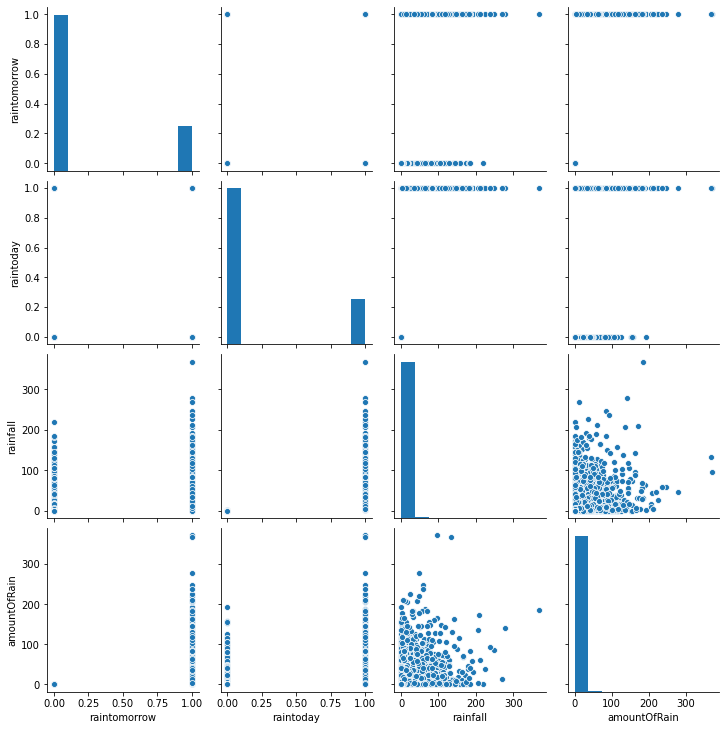

In [ ]:
rain_all = rainw.loc[:,['raintomorrow', 'raintoday', 'rainfall', 'amountOfRain']]
sns.pairplot(rain_all);

#### Analysis of rain related colunms (conclusions):
* the amountOfRain and rainfall are strongly related
* the amountOfRain predicted the value for the rainfall for the next day

### Analysing  'modelo_vigente' column

In [ ]:
rainw['modelo_vigente']

0         0.089825
1         0.023477
2         0.027580
3         0.023962
4         0.220164
            ...   
164376    0.002556
164378    0.002053
164380    0.023350
164382    0.007195
164384    0.018811
Name: modelo_vigente, Length: 112925, dtype: float64

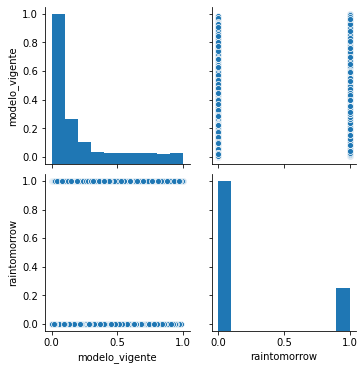

In [ ]:
# Analysing the relationship between modelo_vigente and raintomorrow
mvr = rainw[['modelo_vigente','raintomorrow']]
sns.pairplot(mvr);

#### Predicting results and showing the accuracy score for threshold 50 
[DEU TUDO ERRADO! CIRCULANDO!!! NAO TEM NADA PRA VER AQUI]

In [ ]:
# Analysing if modelo_vigente would be a indicator for raining the next day
y_pred_proba = rainw.loc[:,'modelo_vigente']
y_test = rainw.loc[:,'raintomorrow']
thres_acc = 0.5

for treshold in np.arange(0,1.05,0.05):

    thresh_pred = y_pred_proba.apply(lambda x: 1 if x >= treshold -0.01 else 0)

    recall_scores = [recall_score(y_test,thresh_pred)]
    precision_scores = [precision_score(y_test,thresh_pred)]

#accuracy score
thresh50 = y_pred_proba.apply(lambda x: 1 if x >= thres_acc else 0)
acc_score = round(accuracy_score(y_test,thresh50),4)    

In [ ]:
sns.lineplot(x=np.arange(0,1.05,0.05), y=precision_scores, label='precision')
sns.lineplot(x=np.arange(0,1.05,0.05), y=recall_scores, label='recall')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.legend()
plt.show()

ValueError: arrays must all be same length

## Second Baseline

### Split Model Into Train and Test

#### droping columns:
* amountOfRain: is a indicator of the rainfall for the next day
* rainfall: is very related to amountOfRain
* modelo_vigente: I think this column shows the results of a model based on this dataset. burt I'am droping anyway
* labels: giving the pattern, not being on the data dictionary is a bad sign. 

In [ ]:
# target variables 
y = rainw.copy()['raintomorrow']

X = rainw.copy().drop(columns=['labels','modelo_vigente','rainfall', 'amountOfRain','date','location', 'wind_gustdir', 'wind_dir9am', 'wind_dir3pm', 'raintomorrow'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Standardize

In [ ]:
scalar = StandardScaler()

scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
model = LogisticRegression(n_jobs=-1)

model.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [ ]:
LogisticRegression(n_jobs=-1)

LogisticRegression(n_jobs=-1)

In [ ]:
y_predict = model.predict(X_train)

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
model.score(X_train, y_train)

0.8493358423732565

In [ ]:
model.score(X_test, y_test)

0.8474208545494798

In [ ]:
# matrix de confusão
# arovre de decisão